In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
evd_df = pd.read_csv('../data/ebola_drc_nordkivu/data/ebola_drc-all.csv')
evd_df['Date'] = evd_df.date.apply(lambda x: datetime.strptime(str(x),'%Y%m%d'))

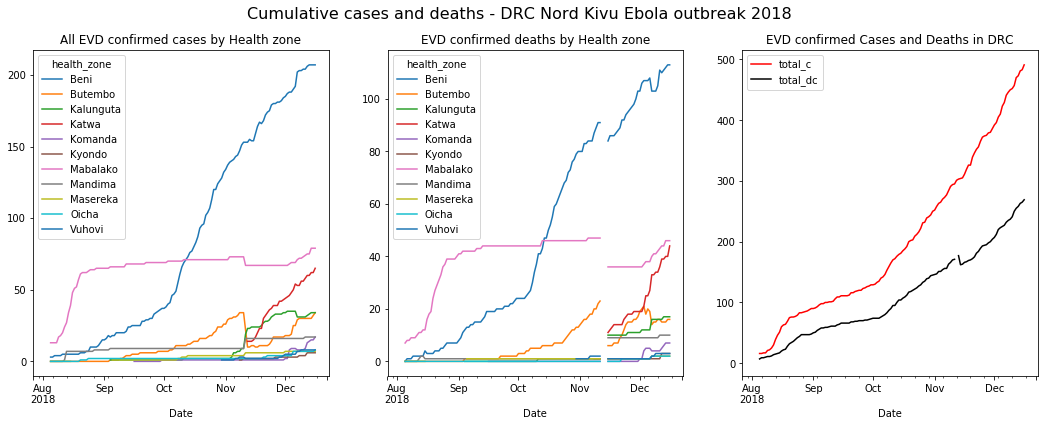

In [5]:
f,axarr = plt.subplots(1,3,figsize=(18,6))
temp = evd_df.groupby(['province','health_zone'])['total_c'].max().reset_index()
active_hz = temp[temp.total_c>5].health_zone.unique()

evd_df[(evd_df.health_zone.isin(active_hz))&(evd_df.province!='all')].pivot(index='Date',columns='health_zone',values='total_c').plot(ax=axarr[0])
evd_df[(evd_df.health_zone.isin(active_hz))&(evd_df.province!='all')].pivot(index='Date',columns='health_zone',values='total_dc').plot(ax=axarr[1])
evd_df[(evd_df.province=='all')].plot(ax=axarr[2],x='Date', y=['total_c', 'total_dc'], color=['red','black'])

axarr[0].set_title('All EVD confirmed cases by Health zone')
axarr[1].set_title('EVD confirmed deaths by Health zone')
axarr[2].set_title('EVD confirmed Cases and Deaths in DRC')
plt.suptitle('Cumulative cases and deaths - DRC Nord Kivu Ebola outbreak 2018',fontsize=16)
plt.savefig('../plots/DRC_NK_EVD_epicurves.png',dpi=100, bbox_inches='tight')

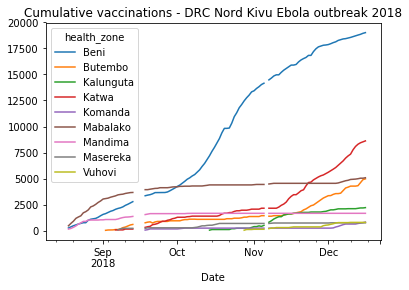

In [6]:
top_vax = evd_df.groupby(['health_zone']).total_vacc.max().reset_index().sort_values('total_vacc',ascending=False)['health_zone'].values[:10]
evd_df[(evd_df.province!='all')&(evd_df.health_zone.isin(top_vax))].pivot(index='Date',columns='health_zone',values='total_vacc').plot()
plt.title('Cumulative vaccinations - DRC Nord Kivu Ebola outbreak 2018', fontsize=12)
plt.savefig('../plots/DRC_NK_EVD_vax.png',dpi=100,bbox_inches='tight')